# **LEGO DATA ANALYSIS**


## Introduction

This analysis aims to help a company decide which LEGO® sets to sell by examining a dataset with details such as target age ranges, reviews, piece counts, themes, and difficulty levels. By identifying popular and profitable products, the company can make data-driven decisions to optimize its selection. For this analysis, price information is not used, as the focus is on selecting the best sets, not determining their pricing.

The dataset includes key attributes such as:  

* ages : The recommended age range for the LEGO set.  
* list_price : The price of the LEGO set in the corresponding country.  
* num_reviews	: The number of customer reviews the LEGO set has received. 
* piece_count : The total number of LEGO pieces included in the set.  
* play_star_rating : Average rating (out of 5 stars) given by customers for playability or fun factor.  (5 being the best)
* prod_desc : A short description of the LEGO set.    	
* prod_id	: A unique identifier number for the LEGO set.  
* prod_long_desc :  A detailed description of the LEGO set, often including features and additional details. 
* review_difficulty : Indicates how challenging the LEGO set is to build.  
* set_name : The name of the LEGO set.   	
* star_rating : Overall average rating (out of 5 stars) based on customer reviews.  	
* theme_name : The theme or category of the LEGO set. (e.g., "Star Wars," "Harry Potter," "City.").  
* val_star_rating : Average rating (out of 5 stars) for the perceived value of the LEGO set (customer satisfaction with the price-to-value relationship of the product).   
* country : The country in which the product was reviewed or is being sold.

Link to the lego dataset used in this project : https://www.kaggle.com/datasets/mterzolo/lego-sets

## Data Collection

In [93]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Loading Data
df = pd.read_csv("/kaggle/input/lego-sets/lego_sets.csv")

In [95]:
# Adding NULL values randomly

import pandas as pd
import numpy as np
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. 

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object. Defaults 0.05

    """
    # Get copy of the original dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [96]:
# Adding NULL values to our dataset and rename it "df_new"
df_new = add_random_missing_values(df, 0.03)

In [97]:
print("Number of rows, Number of columns")
print(df_new.shape)

Number of rows, Number of columns
(12261, 14)


In [98]:
# Observing First 5 Records
df_new.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,NaN,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,NaN,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [99]:
# Observing Last 5 Records 
df_new.tail()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
12256,7-14,36.5878,6.0,341.0,4.4,Protect NINJAGO® City from flying Manta Ray Bo...,70609.0,Help Cole save Shen-Li in this cool THE LEGO® ...,Easy,Manta Ray Bomber,4.3,THE LEGO® NINJAGO® MOVIE™,4.2,PT
12257,7-14,24.3878,8.0,217.0,4.1,Stop a Piranha Attack with Kai and Misako!,70629.0,Play out an action-packed Piranha Mech pursuit...,Easy,Piranha Attack,3.6,THE LEGO® NINJAGO® MOVIE™,4.1,PT
12258,7-14,24.3878,18.0,233.0,4.6,Stop a crime in the NINJAGO® City street market!,70607.0,"Team up with Lloyd Garmadon, Nya and Officer T...",Easy,NaN,4.6,THE LEGO® NINJAGO® MOVIE™,4.5,PT
12259,6-14,12.1878,1.0,48.0,5.0,Achieve Spinjitzu greatness with the Green Ninja!,70628.0,Learn all the skills of Spinjitzu with THE LEG...,Very Easy,Lloyd - Spinjitzu Master,5.0,THE LEGO® NINJAGO® MOVIE™,5.0,PT
12260,6-14,12.1878,11.0,109.0,4.5,Practice your Spinjitzu skills with Kai and Zane!,70606.0,Join the ninja heroes at the dojo with this ac...,Easy,Spinjitzu Training,4.7,THE LEGO® NINJAGO® MOVIE™,4.8,PT


## Data Type Checking
In this step, data types are being checked on each column to see if there are any anomalies. We need to be careful with 'object' columns. 
* Although 'ages' column being object data type might seem like an anomalie,it is not an anomalie. It specifies an age range (6-14, for example) and we will leave it as it is.
* Other columns seem to have expected data types, no data type conversion is needed.

Some columns should be grouped into categories. This will make the data clearer and help us understand the relationships between different variables.

In [100]:
# Using info() to observe data types
df_new.info()
print("\nNumber of NULL Values")
df_new.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               11897 non-null  object 
 1   list_price         11890 non-null  float64
 2   num_reviews        10346 non-null  float64
 3   piece_count        11919 non-null  float64
 4   play_star_rating   10166 non-null  float64
 5   prod_desc          11553 non-null  object 
 6   prod_id            11897 non-null  float64
 7   prod_long_desc     11907 non-null  object 
 8   review_difficulty  9931 non-null   object 
 9   set_name           11894 non-null  object 
 10  star_rating        10347 non-null  float64
 11  theme_name         11880 non-null  object 
 12  val_star_rating    10132 non-null  float64
 13  country            11874 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.3+ MB

Number of NULL Values


ages                  364
list_price            371
num_reviews          1915
piece_count           342
play_star_rating     2095
prod_desc             708
prod_id               364
prod_long_desc        354
review_difficulty    2330
set_name              367
star_rating          1914
theme_name            381
val_star_rating      2129
country               387
dtype: int64

## Data Cleaning

In data cleaning process, we aim to prepare raw data for analysis and machine learning models by transforming it into a clean, structured, and usable format. Few steps are followed to achieve reliable data:
1.  Removing unnecessary columns
2.  Handling missing (NULL) data
3.  Removing duplicates
4.  Categorizing data
5.  Converting data types
6.  Outlier removal


### 1. Removing Unnecessary Columns

There are various countries in our dataset, each using different currencies, such as the United States Dollar, Euro, Canadian Dollar, Czech Koruna, and others. However, in this analysis, our main focus is on determining which products are the most liked, identifying which age groups prefer specific products, and exploring relationships such as between piece count and other attributes. It is more practical to first identify the best products and then address pricing separately. Since prices are not central to this analysis, it is better to delete the 'list_price' column to reduce unnecessary load and simplify the dataset.

In [101]:
# Deleting 'list_price' column
df_new = df_new.drop(columns = ['list_price'])

After removing the 'list_price' column, it's essential to evaluate whether the 'country' column provides valuable information or if it is included solely for tracking prices. To determine this, we can group the dataset by LEGO set IDs ('prod_id') and examine if multiple records with the same ID have identical values across all columns except 'country.' If such records exist, they can be considered duplicates, and it would be more efficient to remove the 'country' column. <br>

* Take the rows where 'prod_id' is 630.0, for example. These rows seem to have identical values across all columns except for the 'country' column. This suggests that the country column may not provide significant value to the analysis, making it a good candidate for deletion.

In [102]:
# Sorting by product ID 
df_new.sort_values(by='prod_id')

,ages,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
1482,4+,180.0,1.0,4.0,Everyone needs one!,630.0,This tool makes it a snap to pull those small ...,Very Easy,Brick Separator,NaN,Classic,4.6,AT
3438,4+,180.0,1.0,4.0,Everyone needs one!,630.0,This tool makes it a snap to pull those small ...,Very Easy,Brick Separator,4.8,NaN,4.6,CH
912,4+,180.0,1.0,4.0,Everyone needs one!,630.0,This tool makes it a snap to pull those small ...,Very Easy,Brick Separator,4.8,Classic,4.6,AU
6228,4+,180.0,1.0,4.0,Everyone needs one!,630.0,This tool makes it a snap to pull those small ...,Very Easy,Brick Separator,4.8,Classic,4.6,FI
10138,4+,180.0,NaN,4.0,Everyone needs one!,630.0,This tool makes it a snap to pull those small ...,Very Easy,Brick Separator,4.8,Classic,4.6,NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12184,6-12,40.0,NaN,4.5,Go bounty hunting with the super-fast speeder ...,NaN,"Get Dengar, Bossk, IG-88 and 4-LOM on the move...",Very Easy,Bounty Hunter Speeder Bike™ Battle Pack,4.7,Star Wars™,4.8,PT
12185,6-12,26.0,117.0,4.3,Send in reinforcements with the First Order Tr...,NaN,Expand your LEGO® Star Wars forces with the Fi...,Very Easy,First Order Transport Speeder Battle Pack,4.7,Star Wars™,4.2,PT
12196,14+,NaN,1967.0,NaN,Collect the ultimate long-range Rebel starfigh...,NaN,Own part of Star Wars history with the Y-Wing ...,NaN,Y-Wing Starfighter™,NaN,Star Wars™,NaN,PT
12239,6-12,18.0,124.0,4.5,Help Batman™ stop The Joker™ escaping!,NaN,Stage a face-off between The Joker™ and Batman...,Easy,The Joker™ Balloon Escape,4.7,THE LEGO® BATMAN MOVIE,4.6,PT


In [103]:
# Deleting country column
df_new = df_new.drop(columns = ['country'])

## Correlation Matrix
With correlation matrix we aim to see which attributes are correlated the most. If there is any correlation close to 1, we may choose to delete one of the columns that is a part of the correlation.

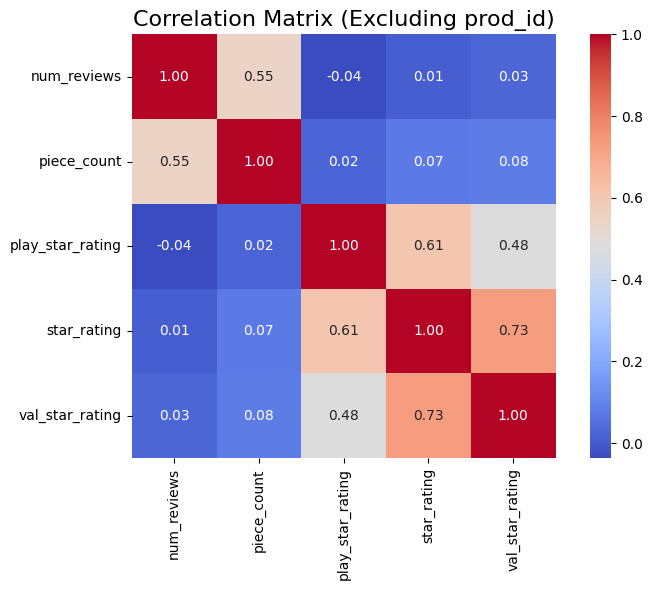

In [104]:
# Correlation Matrix

# Exclude non-numeric columns and `prod_id`
numeric_columns = df_new.select_dtypes(include=['float64', 'int64']).drop(columns=['prod_id'], errors='ignore')

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix (Excluding prod_id)', fontsize=16)
plt.tight_layout()
plt.show()


### 2. Handling Missing Data

Earlier, we added null values randomly, which means there is a possibility that some rows might have null values in every column. Leaving such rows as they are could lead to unreliable insights or create misleading patterns in the analysis. 

In [105]:
print(df_new.isnull().sum())

ages                  364
num_reviews          1915
piece_count           342
play_star_rating     2095
prod_desc             708
prod_id               364
prod_long_desc        354
review_difficulty    2330
set_name              367
star_rating          1914
theme_name            381
val_star_rating      2129
dtype: int64


In [108]:
# Handling non-numerical data
df_new['prod_desc'].fillna('No description available', inplace=True)
df_new['prod_long_desc'].fillna('No detailed description available', inplace=True)
df_new['set_name'].fillna('Unknown Set Name', inplace=True)
df_new['theme_name'].fillna('Unkown Theme Name', inplace=True)

### !!! Important Note
For numerical columns, filling missing values with statistical measures (such as the mode, median, or mean) was avoided. The main reason is that the same product often appears multiple times in the dataset, and filling missing values in these rows could lead to inconsistent values for the same product.

### 3. Removing Duplicates

In [109]:
print(f"Number of duplicate records : {df_new.duplicated().sum()}")

# Removing duplicate records
df_new = df_new.drop_duplicates()

Number of duplicate records : 8434


### 4. Categorizing Data ame

In [110]:
# Checking review_difficulty column 
print(df_new['review_difficulty'].unique())

['Average' 'Easy' 'Challenging' 'Very Easy' nan 'Very Challenging']


In [111]:
# Categorizing review_difficulty column

# Define the mapping
difficulty_numeric_mapping = {
    'Very Easy': 1,
    'Easy': 2,
    'Average': 3,
    'Challenging': 4,
    'Very Challenging': 5,
    # Setting 0 on NULL values
    np.nan: 0  
}

# Applying the mapping to the Difficulty column
df_new['difficulty_numeric'] = df_new['review_difficulty'].map(difficulty_numeric_mapping)


df_new

,ages,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,difficulty_numeric
0,6-12,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,3
1,6-12,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,NaN,Angry Birds™,4.0,2
2,6-12,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,2
3,NaN,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,3
4,12+,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12228,NaN,19.0,433.0,4.4,Team up with Batgirl™ to stop The Joker’s Noto...,70906.0,Join Batgirl’s pursuit of The Joker™ and Harle...,Average,Unknown Set Name,4.7,THE LEGO® BATMAN MOVIE,4.2,3
12239,6-12,18.0,124.0,4.5,Help Batman™ stop The Joker™ escaping!,NaN,Stage a face-off between The Joker™ and Batman...,Easy,The Joker™ Balloon Escape,4.7,THE LEGO® BATMAN MOVIE,4.6,2
12241,8-14,9.0,643.0,4.4,Launch a space mission from the Batcave!,70923.0,Take off from the Batcave in The Bat-Space Shu...,NaN,The Bat-Space Shuttle,4.8,THE LEGO® BATMAN MOVIE,NaN,0
12244,9-14,NaN,1403.0,4.5,Evade the traps inside the Temple!,70617.0,Join a ninja mission to infiltrate THE LEGO® N...,Average,Temple of The Ultimate Ultimate Weapon,4.8,THE LEGO® NINJAGO® MOVIE™,4.8,3


## Statistical Analysis
Statistical analysis helps us understand numerical columns by providing key information like the minimum, maximum, average, and standard deviation. These numbers help us see how the data is spread out and find possible outliers. By spotting values that are far from the normal range, we can identify outliers (if any) and decide how to handle them in our analysis.

Now let's take a closer look at numerical columns:
* num_revies
    * Mean: On average, products have 17 reviews. 
    * Min and Max: The minimum number of reviews is 1, while the maximum is 367, showing that some products have very few reviews and others are highly reviewed. We can identify products with a low number of reviews, which could either indicate they are new or unpopular. Products with higher reviews may have more popularity. We may prioritize products with very high review counts to focus on.
* piece_count
    * Mean: The average number of pieces in the sets is 520, indicating that many products might be larger sets with a higher piece count.
    * Min and Max: The smallest set has 1 piece, and the largest has 7,541 pieces. The extreme values show there is a wide variety in set sizes. 7,541 might seem like an outlier, but there are many lego sets that have more than 7000 pieces.
* play_star_rating
    * Mean: The average play star rating is 4.35, which is fairly high and indicates that, on average, customers are satisfied with the play experience.
    * Min and Max: The lowest play rating is 1, and the highest is 5. A low play rating (1) might indicate issues with the product, such as poor playability or dissatisfaction with the design. 
<br><br>
* prod_id: This column is essential for identifying products. We can cross-reference this with other columns to track performance. We do not apply statistical analysis on this column.
* star_rating
    *  Mean: The average star rating is 4.51, showing a general trend of customer satisfaction.
    * Min and Max: The lowest rating is 1.8 and the highest is 5. This range shows that some products are rated very poorly, while others are rated very highly.

* val_star_rating
    *  Mean: The average value rating is 4.22, which tells us customers generally feel that the products are worth their price.
    * Min and Max: The lowest value rating is 1, and the highest is 5, indicating some products are perceived as poor value while others are considered excellent value.

In [112]:
## Statistical Analysis
df_new.describe()

,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating,difficulty_numeric
count,3219.000000,3533.000000,3177.000000,3.520000e+03,3218.000000,3146.000000,3827.000000
mean,17.659832,520.304557,4.357192,5.972541e+04,4.516128,4.226796,2.029266
std,38.118101,839.978763,0.625210,1.506550e+05,0.511227,0.651297,1.218511
min,1.000000,1.000000,1.000000,6.300000e+02,1.800000,1.000000,0.000000
25%,2.000000,102.000000,4.000000,2.130975e+04,4.300000,4.000000,1.000000
50%,6.000000,233.000000,4.500000,4.550150e+04,4.600000,4.300000,2.000000
75%,14.000000,569.000000,4.800000,7.123575e+04,5.000000,4.700000,3.000000
max,367.000000,7541.000000,5.000000,2.000431e+06,5.000000,5.000000,5.000000


## Data Visualization
Data visualization helps us identify patterns and relationships in the dataset, such as which LEGO products are popular or highly rated. It allows us to spot trends, outliers, and make informed decisions on which products to focus on.


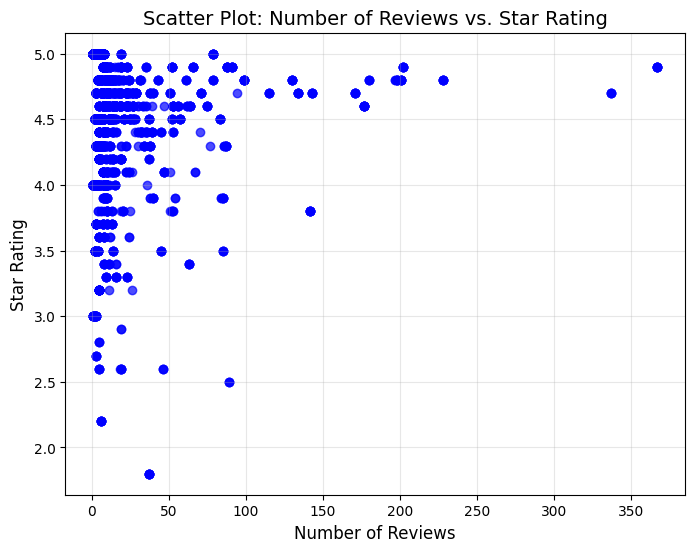

In [113]:
# num_reviews vs. star_rating scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_new['num_reviews'], df_new['star_rating'], alpha=0.7, color='blue')
plt.title('Scatter Plot: Number of Reviews vs. Star Rating', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Star Rating', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

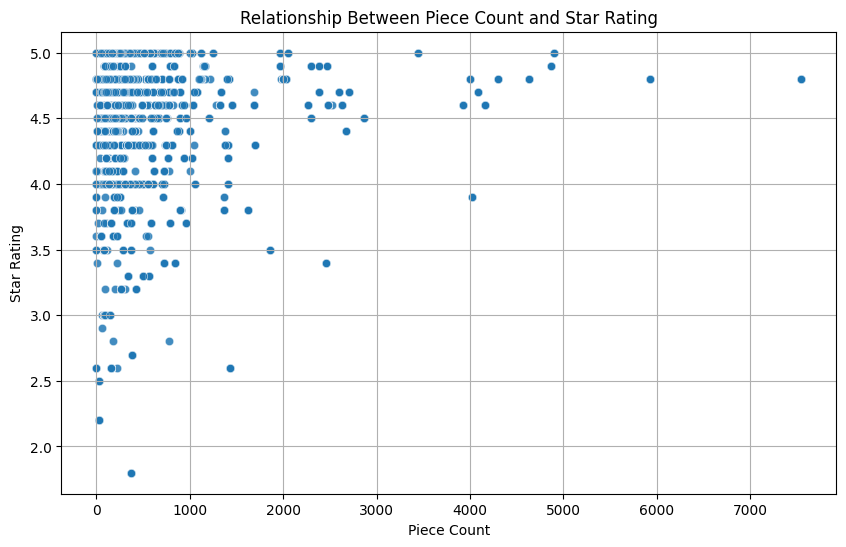

In [114]:
# play_star_rating vs. val_star_rating scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='piece_count', y='star_rating', alpha=0.6)

plt.title('Relationship Between Piece Count and Star Rating')
plt.xlabel('Piece Count')
plt.ylabel('Star Rating')
plt.grid(True)
plt.show()

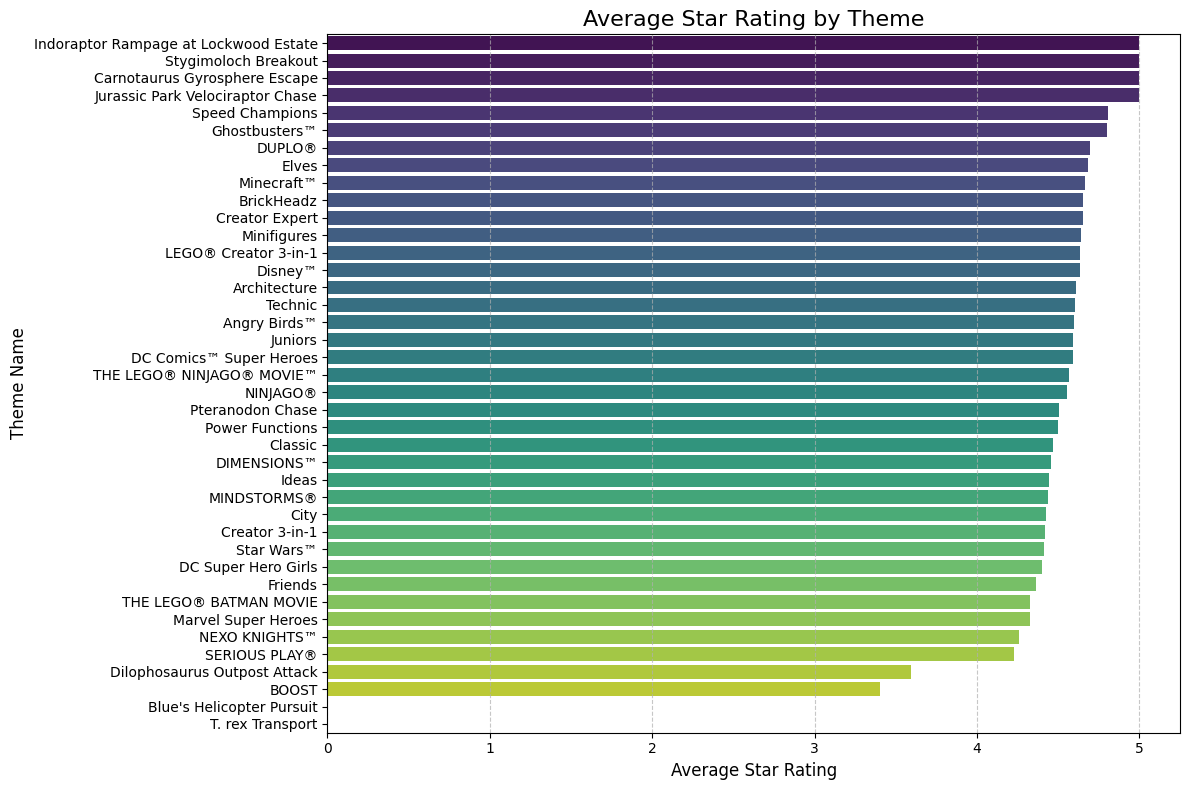

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean star_rating for each theme
theme_rating = df.groupby('theme_name')['star_rating'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=theme_rating.values, y=theme_rating.index, palette="viridis")

plt.title('Average Star Rating by Theme', fontsize=16)
plt.xlabel('Average Star Rating', fontsize=12)
plt.ylabel('Theme Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


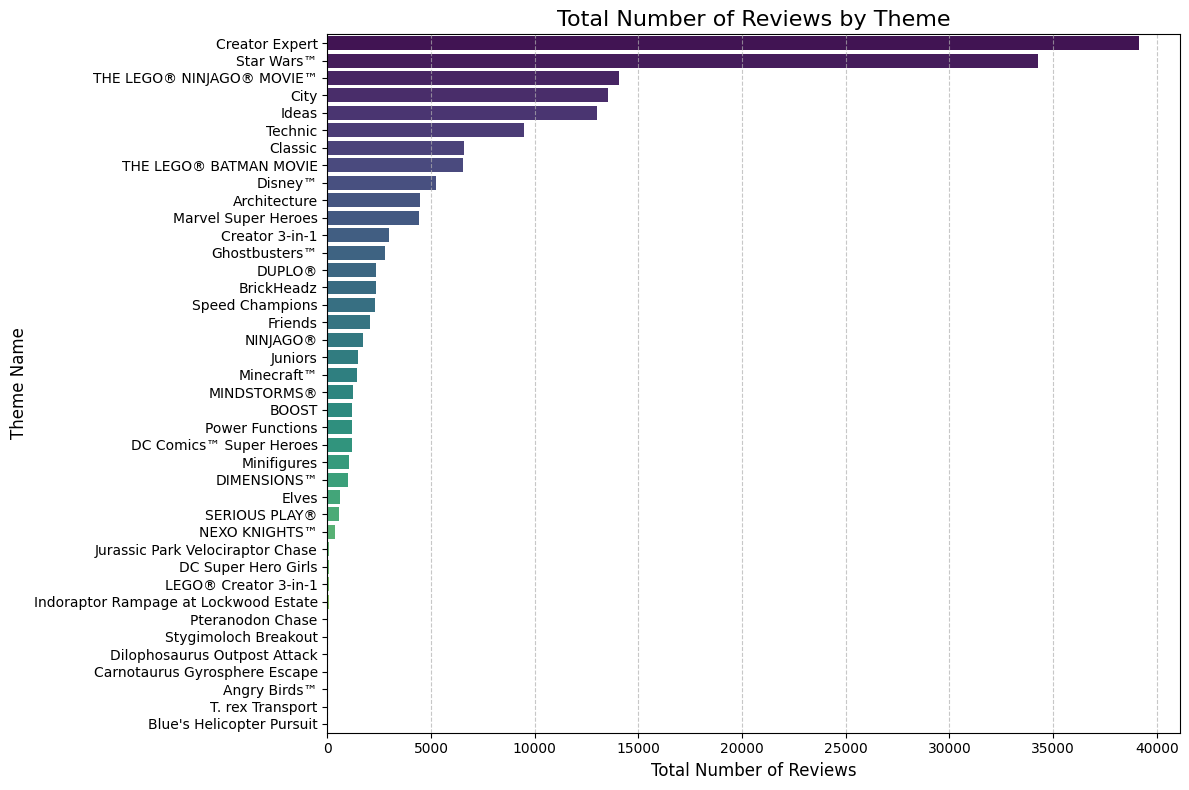

In [116]:
# theme_name vs. num_reviews
# Group by theme_name and calculate the total number of reviews
theme_reviews = df.groupby('theme_name')['num_reviews'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=theme_reviews.values, y=theme_reviews.index, palette="viridis")


plt.title('Total Number of Reviews by Theme', fontsize=16)
plt.xlabel('Total Number of Reviews', fontsize=12)
plt.ylabel('Theme Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


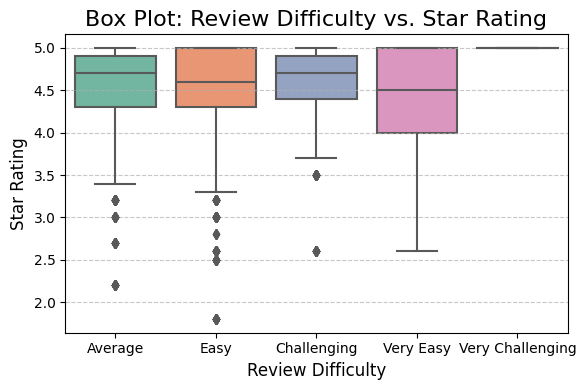

In [117]:
# review_difficulty vs. star_rating
# Box Plot: review_difficulty vs. star_rating
plt.figure(figsize=(6, 4))
sns.boxplot(x='review_difficulty', y='star_rating', data=df, palette="Set2")
plt.title('Box Plot: Review Difficulty vs. Star Rating', fontsize=16)
plt.xlabel('Review Difficulty', fontsize=12)
plt.ylabel('Star Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [118]:
# Relationship between ages and play_star_rating
age_rating_avg = df.groupby('ages')['play_star_rating'].mean()
print(age_rating_avg.sort_values())

ages
7+       2.100000
10+      3.490331
9+       3.600000
1½-3     3.678261
12-16    3.700000
12+      3.855705
4+       4.000000
14+      4.167337
8-12     4.189666
10-14    4.200000
11-16    4.242424
10-16    4.295238
4-99     4.323973
5-12     4.340129
9-14     4.372756
7-14     4.375365
16+      4.395000
5+       4.414085
6-12     4.422867
8-14     4.458357
6+       4.467808
9-16     4.497826
7-12     4.524537
4-7      4.572112
9-12     4.600000
8+       4.655122
2-5      4.655396
1½-5     4.677612
6-14     4.689865
10-21    4.820000
5-8      5.000000
Name: play_star_rating, dtype: float64


This relationship was observed to understand which age groups find LEGO sets fun to play with, helping to identify which age categories have higher or lower play ratings for different products. These observations suggest that LEGO sets aimed at older children (especially those targeting the 5-8 age group) tend to receive higher ratings, possibly because the sets are more complex or enjoyable. Meanwhile, sets for younger children may receive lower ratings due to simpler designs or less engaging features. We must check the relationship between review_difficulty and play_star_rating

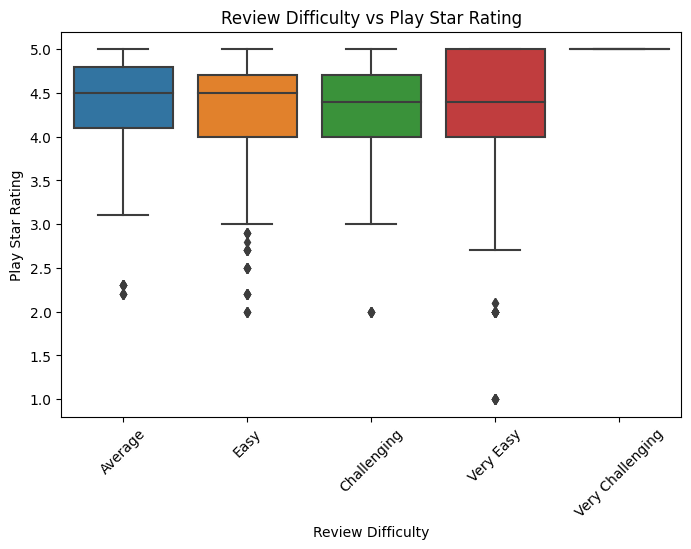

In [119]:
# review_difficulty vs. play_star_rating

plt.figure(figsize=(8,5))
sns.boxplot(x='review_difficulty', y='play_star_rating', data=df_new)

plt.title('Review Difficulty vs Play Star Rating')
plt.xlabel('Review Difficulty')
plt.ylabel('Play Star Rating')

plt.xticks(rotation=45)
plt.show()

## How To Make Use of This Analysis?
 Since we're trying to predicting whether a LEGO set will be liked or not, we can use classification techniques to build a model. <br>
 For example:
 * Logistic Regression : Can handle binary classification tasks like predicting if a set will receive a high rating or not.
 * Random Forest : Handles mixed data types well (numerical like play_star_rating and categorical like theme_name).
 